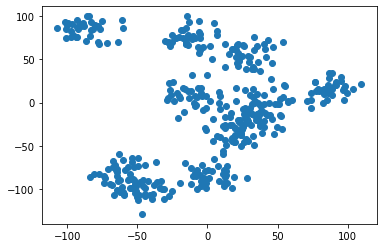

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
X = pd.read_csv("clustering.csv", names=["x", "y"])

plt.scatter(X["x"], X["y"])
plt.show()

In [11]:
from sklearn.cluster import KMeans

def plot_kmeans_clusters(X, n_clusters):
    model = KMeans(n_clusters=n_clusters, random_state=0)
    y = model.fit_predict(X)
    plt.scatter(X["x"], X["y"], c=y, s=30, cmap='viridis')

    centers = model.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.75)
    plt.title('K-means clusters')
    plt.show()

Na pierwszy rzut oka można dla tych punktów wyróżnić 8 klastrów - sprawdźmy czy metoda K-means pokaże takie klastry jakich się spodziewamy.

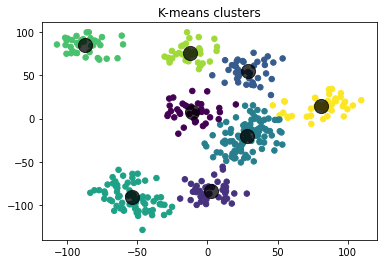

In [12]:
plot_kmeans_clusters(X, 8)

Poza przyłączeniem kilku punktów do żółtego klastra zamiast morskiego(?) wszystko wygląda tak, jak można było się spodziewać.

Sprawdźmy teraz czy jest to optymalna liczba klastrów - użyjemy do tego na początek metody łokcia.

In [13]:
def count_wcss_scores(X, k_max):
    scores = []
    for k in range(1, k_max+1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        wcss = kmeans.score(X)*-1
        scores.append(wcss)
    return scores

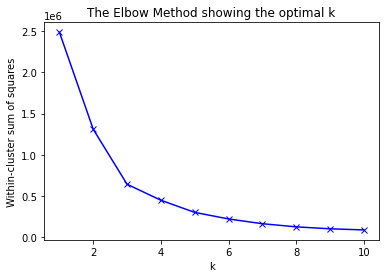

In [7]:
wcss_vec = count_wcss_scores(X, 10)
x_ticks = list(range(1, len(wcss_vec) + 1))
plt.plot(x_ticks, wcss_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Within-cluster sum of squares')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Metoda łokcia w tym przypadku nie pokazuje wyraźnie optymalnej liczby klastrów - największe jej przegięcie jest dla k=3. Sprawdźmy więc jak wygląda podział tych punktów na 3 klastry.

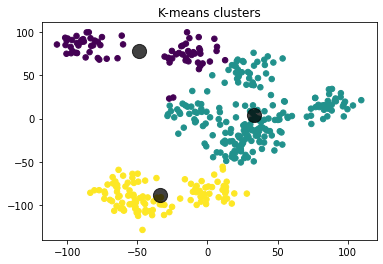

In [8]:
plot_kmeans_clusters(X, 3)

Podział ten nie wygląda na pewno tak dobrze jak ten dla k=8. W szczególności źle wyglądają klastry żółty i fioletowy, gdzie większość ich punktów jest oddalona ich środków, a nawet można w nich zauważyć po dwie oddzielne grupy, z których możnaby zrobić dwa oddzielne klastry.

Spróbujmy więc teraz znaleźć optymalne k przy użyciu metody silhouette.

In [9]:
def count_clustering_scores(X, cluster_num, model, score_fun):
    if isinstance(cluster_num, int):
        cluster_num_iter = [cluster_num]
    else:
        cluster_num_iter = cluster_num
        
    scores = []    
    for k in cluster_num_iter:
        model_instance = model(n_clusters=k)
        labels = model_instance.fit_predict(X)
        wcss = score_fun(X, labels)
        scores.append(wcss)
    
    if isinstance(cluster_num, int):
        return scores[0]
    else:
        return scores

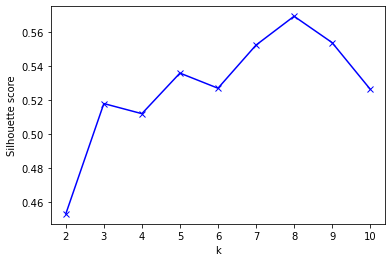

In [10]:
from sklearn.metrics import silhouette_score

cluster_num_seq = range(2, 11)
silhouette_vec = count_clustering_scores(X, cluster_num_seq, KMeans, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

Tutaj otrzymany wynik (k=8) cieszy nas dużo bardziej, ponieważ jest zgodny z wstepną oceną "na oko" i podział punktów na taką liczbę klastrów wygląda na dobrze dopasowany.

In [14]:
from sklearn.cluster import AgglomerativeClustering

def plot_agglomerative_clusters(X, n_clusters):
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage = 'average')
    y = model.fit_predict(X)
    plt.scatter(X["x"], X["y"], c=y, s=30, cmap='viridis')
    plt.title('Agglomerative clusters')
    plt.show()

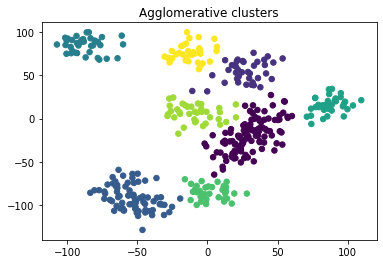

In [15]:
plot_agglomerative_clusters(X, 8)

Spróbujmy teraz znaleźć optymalną liczbę klastrów przy pomocy indeksu Davies'a-Bouldin'a.

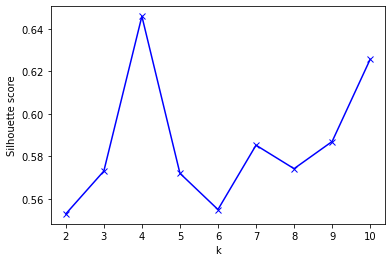

In [19]:
from sklearn.metrics import davies_bouldin_score
from functools import partial

clustering_func = partial(AgglomerativeClustering, linkage='average')
cluster_num_seq = range(2, 11)
daviesbouldin_vec = count_clustering_scores(X, cluster_num_seq, clustering_func, davies_bouldin_score)
plt.plot(cluster_num_seq, daviesbouldin_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

Zgodnie z definicją indeksu Davies'a-Bouldin'a, optymalne liczby klastrów to te, dla których indeks ten jest jak najmniejszy. 

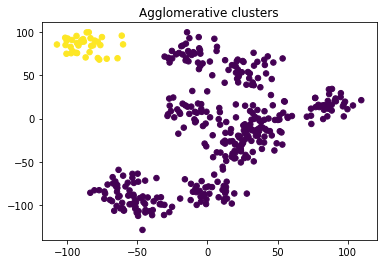

In [20]:
plot_agglomerative_clusters(X, 2)

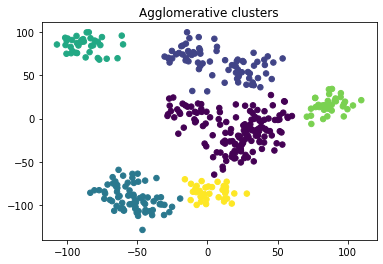

In [21]:
plot_agglomerative_clusters(X, 6)

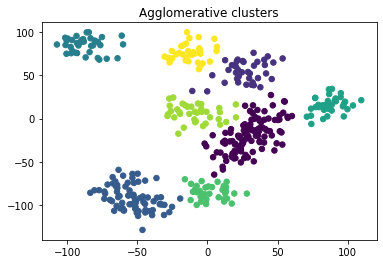

In [22]:
plot_agglomerative_clusters(X, 8)

Jak widać, dla różnych modeli klasteryzacji oraz róznych metryk oceniających je otrzymujemy różne nie tylko optymalne liczby klastrów, ale i przyporządkowanie obserwacji.